In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import librosa
librosa.get_duration(filename='/content/drive/MyDrive/Intelligence Augmentation/Dataset/157.wav')

5.108004535147392

In [ ]:
dt = pd.read_csv("/content/drive/MyDrive/Intelligence Augmentation/Dataset/train_wav.csv",index_col=0)
dt

,filename,emotion
0,18777.wav,neutral
1,24041.wav,neutral
2,1621.wav,joy
3,28883.wav,neutral
4,14918.wav,neutral
...,...,...
5811,6688.wav,neutral
5812,41901.wav,fear
5813,2066.wav,neutral
5814,10825.wav,surprise


In [ ]:
time = []
for i in dt['filename']:
  au = "/content/drive/MyDrive/Intelligence Augmentation/Dataset/TrainAudio/" + i
  s = librosa.get_duration(filename=au)
  time.append(s)

In [ ]:
time

## IMPORT THE DATASET...

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Intelligence Augmentation/Dataset/extract_time.csv",index_col=0)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,emotion,time duration
0,-284.482758,126.683823,-36.903915,43.976826,-12.961371,8.616020,-10.584815,12.599451,-14.106994,2.853625,-19.962849,1.703447,-13.035324,-0.337073,-9.029764,2.131634,-8.832778,-1.266960,2.483978,4.040265,-2.574543,4.316617,5.576896,4.538510,-2.905437,-9.130464,-7.126249,-4.621140,1.610941,-1.597993,-4.868733,-4.488620,0.970274,5.310254,2.055159,-4.810302,-3.550115,-0.912865,0.987710,-3.169195,neutral,2.469637
1,-291.756378,86.479385,-31.917055,28.526455,-21.277540,6.544608,-26.522366,0.857760,-19.578068,9.424254,-15.387749,-1.319279,-14.049103,3.400151,-9.289942,-1.578900,-10.043350,3.212034,-8.140825,-2.060176,-5.583338,-1.114504,-2.181613,0.425673,-0.556289,3.811432,0.392357,1.247997,-1.299044,-2.572325,-4.302300,-1.309161,-1.129280,-0.781117,0.173170,0.295313,0.099329,0.685805,-0.623442,-1.003877,neutral,3.383923
2,-381.791229,125.338554,-13.164070,70.746918,-14.940821,0.121462,-15.981153,-1.870955,-17.828106,0.436152,-17.293005,5.565217,-11.894168,-2.076418,-5.616802,-4.331069,-10.762467,-5.230440,-8.456790,4.806179,-5.453306,-2.912219,3.964604,-2.836176,0.997076,1.716107,-3.087765,-1.639011,-1.344397,3.572985,8.062300,5.931730,9.156085,4.193003,-0.938635,-5.856699,-2.251703,-2.078479,1.565114,-3.527836,joy,0.379841
3,-239.395355,117.492027,-47.426998,15.590010,-31.452276,10.473926,-15.031138,-3.744267,-13.968476,11.110762,-15.036322,0.180499,-14.177242,0.895325,-7.295934,-3.230096,-14.846791,0.266336,-5.302069,-0.801351,-4.021996,2.557503,-2.232066,-0.212296,-1.715083,0.353755,-1.177485,3.265667,2.864474,-0.795712,-1.337174,-0.222455,0.076919,2.235695,2.183837,-0.755808,-0.094991,0.606268,0.243874,-0.301148,neutral,1.581474
4,-396.290375,87.998093,-8.710562,25.149500,-20.656134,19.762743,-8.971614,11.300339,-12.466163,15.747955,-8.156489,3.519957,-10.689272,8.925682,-10.783387,-0.155382,-6.888598,2.062116,-9.169439,0.586334,-1.464928,-2.857843,-4.133466,2.324855,-4.027257,-2.621431,-1.941476,0.106234,-1.970433,-1.547358,2.298595,1.576666,-0.154721,0.841168,0.910432,-1.836838,-2.386293,0.062624,-0.866900,-3.002568,neutral,2.835351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5811,-303.811066,82.151154,-19.841032,22.865196,-27.335863,12.796340,-20.081320,6.375761,-20.224041,13.085917,-13.882845,-1.656839,-7.396470,4.875012,-12.082308,7.704602,-13.588083,3.252085,-2.739040,2.967342,-8.281710,-3.470061,-4.085635,2.730221,-4.898755,7.239167,2.399259,6.088852,-0.968148,0.266095,-0.771206,2.493212,1.298435,1.398035,-1.703708,-0.411720,-0.576614,-2.279161,-2.045204,0.341458,neutral,1.346372
5812,-276.304901,125.174080,2.612422,27.333225,-14.698323,4.655150,-9.317362,-2.310907,-11.867435,-5.172067,4.978729,-11.068040,0.976734,-9.240800,-1.483078,-2.321427,-9.096735,-5.681006,-6.496010,-4.395505,-4.212647,4.982008,2.797885,2.108736,1.904619,-1.644525,-1.584329,0.163488,3.982300,2.662991,3.312881,2.443014,1.647278,0.188844,-1.787909,-0.779580,1.519891,3.969755,2.266497,-0.545543,fear,2.135438
5813,-348.516418,148.282562,-40.574677,26.640495,-10.928119,1.786632,-32.046860,-8.946752,-4.982909,-11.093018,-16.674091,16.738503,-19.181549,-1.297042,-9.041497,3.884277,-10.367697,6.670284,-8.201445,-7.299901,-7.846807,-0.256417,0.264976,-5.230467,-11.529827,3.824796,-6.711344,-4.769721,2.440644,-4.011098,1.340225,4.026213,-3.000434,-4.211085,-4.156709,3.954352,4.361295,4.792313,6.145772,6.907682,neutral,0.170862
5814,-247.744675,122.912102,-51.167747,7.046939,-28.622879,10.458705,-12.988446,2.335321,-20.698025,14.287807,-11.633974,3.944654,-13.888461,2.221986,-10.413725,-1.982562,-11.340649,2.128350,-5.563091,-0.356873,-2.185826,0.151242,-3.869707,-0.870960,-3.360066,-2.022477,-1.520796,-2.566534,-0.426506,-0.528329,-2.094429,-0.430900,-1.951538,-0.341641,0.602907,0.017858,4.263083,3.

In [ ]:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['emotion'] = le.fit_transform(data["emotion"])
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,emotion,time duration
0,-284.482758,126.683823,-36.903915,43.976826,-12.961371,8.616020,-10.584815,12.599451,-14.106994,2.853625,-19.962849,1.703447,-13.035324,-0.337073,-9.029764,2.131634,-8.832778,-1.266960,2.483978,4.040265,-2.574543,4.316617,5.576896,4.538510,-2.905437,-9.130464,-7.126249,-4.621140,1.610941,-1.597993,-4.868733,-4.488620,0.970274,5.310254,2.055159,-4.810302,-3.550115,-0.912865,0.987710,-3.169195,4,2.469637
1,-291.756378,86.479385,-31.917055,28.526455,-21.277540,6.544608,-26.522366,0.857760,-19.578068,9.424254,-15.387749,-1.319279,-14.049103,3.400151,-9.289942,-1.578900,-10.043350,3.212034,-8.140825,-2.060176,-5.583338,-1.114504,-2.181613,0.425673,-0.556289,3.811432,0.392357,1.247997,-1.299044,-2.572325,-4.302300,-1.309161,-1.129280,-0.781117,0.173170,0.295313,0.099329,0.685805,-0.623442,-1.003877,4,3.383923
2,-381.791229,125.338554,-13.164070,70.746918,-14.940821,0.121462,-15.981153,-1.870955,-17.828106,0.436152,-17.293005,5.565217,-11.894168,-2.076418,-5.616802,-4.331069,-10.762467,-5.230440,-8.456790,4.806179,-5.453306,-2.912219,3.964604,-2.836176,0.997076,1.716107,-3.087765,-1.639011,-1.344397,3.572985,8.062300,5.931730,9.156085,4.193003,-0.938635,-5.856699,-2.251703,-2.078479,1.565114,-3.527836,3,0.379841
3,-239.395355,117.492027,-47.426998,15.590010,-31.452276,10.473926,-15.031138,-3.744267,-13.968476,11.110762,-15.036322,0.180499,-14.177242,0.895325,-7.295934,-3.230096,-14.846791,0.266336,-5.302069,-0.801351,-4.021996,2.557503,-2.232066,-0.212296,-1.715083,0.353755,-1.177485,3.265667,2.864474,-0.795712,-1.337174,-0.222455,0.076919,2.235695,2.183837,-0.755808,-0.094991,0.606268,0.243874,-0.301148,4,1.581474
4,-396.290375,87.998093,-8.710562,25.149500,-20.656134,19.762743,-8.971614,11.300339,-12.466163,15.747955,-8.156489,3.519957,-10.689272,8.925682,-10.783387,-0.155382,-6.888598,2.062116,-9.169439,0.586334,-1.464928,-2.857843,-4.133466,2.324855,-4.027257,-2.621431,-1.941476,0.106234,-1.970433,-1.547358,2.298595,1.576666,-0.154721,0.841168,0.910432,-1.836838,-2.386293,0.062624,-0.866900,-3.002568,4,2.835351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5811,-303.811066,82.151154,-19.841032,22.865196,-27.335863,12.796340,-20.081320,6.375761,-20.224041,13.085917,-13.882845,-1.656839,-7.396470,4.875012,-12.082308,7.704602,-13.588083,3.252085,-2.739040,2.967342,-8.281710,-3.470061,-4.085635,2.730221,-4.898755,7.239167,2.399259,6.088852,-0.968148,0.266095,-0.771206,2.493212,1.298435,1.398035,-1.703708,-0.411720,-0.576614,-2.279161,-2.045204,0.341458,4,1.346372
5812,-276.304901,125.174080,2.612422,27.333225,-14.698323,4.655150,-9.317362,-2.310907,-11.867435,-5.172067,4.978729,-11.068040,0.976734,-9.240800,-1.483078,-2.321427,-9.096735,-5.681006,-6.496010,-4.395505,-4.212647,4.982008,2.797885,2.108736,1.904619,-1.644525,-1.584329,0.163488,3.982300,2.662991,3.312881,2.443014,1.647278,0.188844,-1.787909,-0.779580,1.519891,3.969755,2.266497,-0.545543,2,2.135438
5813,-348.516418,148.282562,-40.574677,26.640495,-10.928119,1.786632,-32.046860,-8.946752,-4.982909,-11.093018,-16.674091,16.738503,-19.181549,-1.297042,-9.041497,3.884277,-10.367697,6.670284,-8.201445,-7.299901,-7.846807,-0.256417,0.264976,-5.230467,-11.529827,3.824796,-6.711344,-4.769721,2.440644,-4.011098,1.340225,4.026213,-3.000434,-4.211085,-4.156709,3.954352,4.361295,4.792313,6.145772,6.907682,4,0.170862
5814,-247.744675,122.912102,-51.167747,7.046939,-28.622879,10.458705,-12.988446,2.335321,-20.698025,14.287807,-11.633974,3.944654,-13.888461,2.221986,-10.413725,-1.982562,-11.340649,2.128350,-5.563091,-0.356873,-2.185826,0.151242,-3.869707,-0.870960,-3.360066,-2.022477,-1.520796,-2.566534,-0.426506,-0.528329,-2.094429,-0.430900,-1.951538,-0.341641,0.602907,0.017858,4.263083,3.528074,3.105392,2.124846,6,1.215760


In [ ]:
le.inverse_transform([0,1,2,3,4,5,6])

array(['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness',
       'surprise'], dtype=object)

In [ ]:
values = data[(data['time duration']<= 1)]
values

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,emotion,time duration
2,-381.791229,125.338554,-13.164070,70.746918,-14.940821,0.121462,-15.981153,-1.870955,-17.828106,0.436152,-17.293005,5.565217,-11.894168,-2.076418,-5.616802,-4.331069,-10.762467,-5.230440,-8.456790,4.806179,-5.453306,-2.912219,3.964604,-2.836176,0.997076,1.716107,-3.087765,-1.639011,-1.344397,3.572985,8.062300,5.931730,9.156085,4.193003,-0.938635,-5.856699,-2.251703,-2.078479,1.565114,-3.527836,3,0.379841
8,-386.890900,107.489929,-23.422226,8.922732,-32.781723,7.916790,-6.325517,18.409006,-3.143468,16.732914,-0.709077,9.873822,-12.846749,12.460625,-2.401070,-6.347486,-0.379912,4.121527,-7.439929,1.007869,0.872141,-3.335157,6.173044,4.986257,1.263212,-2.358498,-3.932328,-8.013582,-4.989693,-1.603951,-2.957710,-4.808696,2.766864,2.280922,1.898166,1.361015,-3.814681,0.142324,1.512425,-2.593395,6,0.876168
17,-277.377167,109.705956,-44.771210,17.846910,-22.276905,0.087097,-28.327171,-8.469015,-21.094425,5.576337,-16.327080,-3.329092,-15.509323,2.218548,-9.282254,0.839679,-2.909082,-2.365383,-7.816183,2.961316,-4.987657,-7.927056,-9.455245,-2.791865,-2.233306,1.522361,2.453784,1.396065,0.124235,-0.687586,-1.612143,-1.373819,-0.726769,3.900887,3.484869,0.951183,-1.260730,-2.285726,0.488137,-3.867714,3,0.797800
26,-300.720001,114.988991,-61.892689,-24.781429,-16.750402,13.635815,-34.514568,-1.876055,-17.053843,21.967909,-15.785351,-4.715463,-9.737355,-0.533003,-11.815829,1.699305,0.018886,5.268331,-6.022515,-3.058977,-9.128667,-0.462705,6.081796,6.349141,-3.513684,-4.924727,-8.208704,-1.542095,-5.863399,8.615917,1.300595,6.955926,1.380338,0.848650,4.618783,-2.490377,-3.611752,-6.192451,2.120849,1.428213,4,0.432086
27,-359.989746,160.893845,11.544590,14.300426,-45.146164,-3.897443,-24.261204,20.511852,-8.123702,-2.261884,-13.230378,-0.944232,-8.830128,7.099147,-8.504193,6.018486,-13.093309,0.594185,-11.474592,2.757787,-7.542228,-5.321933,-6.714864,-4.472362,-9.504080,-1.941435,-6.221910,-8.930498,-8.731060,-7.171274,-6.471822,1.853018,0.871981,3.264306,0.808575,-1.321337,-0.685813,1.843288,0.782499,-2.675897,4,0.196984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5764,-304.624023,97.066757,-60.707569,7.707717,-39.661423,-13.569098,-23.106800,4.092902,-16.890163,1.639221,-11.338679,8.231263,-14.271736,9.912724,-3.270490,4.005447,-5.686886,2.527364,-7.343942,-0.779768,-4.856477,1.661081,-1.755662,5.014169,-1.667251,-2.373505,-8.506416,-1.291342,0.067937,0.503939,-3.481009,-0.087191,-0.102971,3.476156,2.317152,1.336186,-0.500503,0.068720,0.767456,0.272472,3,0.771678
5776,-355.343353,116.134926,-31.458733,36.010876,-56.578499,8.646227,-40.465343,-3.281311,-8.522659,22.627705,-15.439355,-4.263639,-1.463856,-12.568251,-4.370549,-2.158358,-5.766037,-0.955335,-2.078900,-1.253903,-9.579380,-5.246021,-11.526049,-8.302732,-3.743216,-4.414515,-4.567496,-0.153108,-6.195282,-3.707426,-5.520072,-7.127348,1.958005,3.740799,9.788453,11.260942,12.056489,8.723301,4.327650,0.965861,4,0.196984
5780,-346.120514,85.218987,-40.839771,20.683844,-19.338943,21.271223,-12.065933,7.087970,-7.695679,17.943373,-16.763313,-20.184587,-17.649532,-4.340170,-0.654100,9.609307,12.654895,4.015944,-7.860956,-11.716032,-1.053247,-3.416747,5.600083,-0.663344,-8.083913,7.445827,-2.679332,-9.997879,0.174943,0.002217,0.214474,-1.355020,1.673648,0.940035,-1.885628,-2.130528,1.047045,-2.745154,0.334311,1.219613,4,0.641066
5787,-371.968536,33.156132,-8.112420,52.499722,-21.527626,30.453447,-22.516563,2.480383,-15.009758,16.093008,-26.907129,9.878845,1.835178,6.115266,-14.814979,5.405283,-3.973854,14.226032,-3.938955,8.388220,-2.602035,1.285240,-0.291341,8.307320,-4.180598,0.490663,-4.333975,2.093137,-4.986821,-4.078897,-5.257600,1.337214,-4.177490,-1.834763,-8.075660,-4.936290,-8.517640,-0.190708,-1.449807,1.149422,4,0.275351

In [ ]:
values['emotion'].unique()

array([3, 6, 4, 2, 0, 5, 1])

In [ ]:
values.groupby('emotion').count()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,time duration
emotion,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47
1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
2,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
3,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82
4,234,234,234,234,234,234,234,234,234,234,234,234,234,234,234,234,234,234,234,234,234,234,234,234,234,234,234,234,234,234,234,234,234,234,234,234,234,234,234,234,234
5,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14
6,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64


In [ ]:
values = values[(values['emotion'] == 4)]
values

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,emotion,time duration
26,-300.720001,114.988991,-61.892689,-24.781429,-16.750402,13.635815,-34.514568,-1.876055,-17.053843,21.967909,-15.785351,-4.715463,-9.737355,-0.533003,-11.815829,1.699305,0.018886,5.268331,-6.022515,-3.058977,-9.128667,-0.462705,6.081796,6.349141,-3.513684,-4.924727,-8.208704,-1.542095,-5.863399,8.615917,1.300595,6.955926,1.380338,0.848650,4.618783,-2.490377,-3.611752,-6.192451,2.120849,1.428213,4,0.432086
27,-359.989746,160.893845,11.544590,14.300426,-45.146164,-3.897443,-24.261204,20.511852,-8.123702,-2.261884,-13.230378,-0.944232,-8.830128,7.099147,-8.504193,6.018486,-13.093309,0.594185,-11.474592,2.757787,-7.542228,-5.321933,-6.714864,-4.472362,-9.504080,-1.941435,-6.221910,-8.930498,-8.731060,-7.171274,-6.471822,1.853018,0.871981,3.264306,0.808575,-1.321337,-0.685813,1.843288,0.782499,-2.675897,4,0.196984
52,-423.892303,103.445663,-29.140390,38.160103,-19.501276,0.220116,-9.746396,5.005087,-21.026114,1.702988,-10.703761,17.521416,-4.778687,7.959586,-3.605580,2.685656,-4.854250,-3.078233,1.578937,-4.505032,-0.493131,-6.405525,-7.736833,0.397988,-9.289034,-1.779142,-1.201850,-5.297039,-1.243702,-5.405533,1.210395,-7.599728,-2.356741,-1.906094,-2.930217,0.526206,-2.059402,-2.464669,-2.620090,-3.492743,4,0.484331
58,-311.246674,132.709824,-28.192528,21.996702,-23.621075,11.022913,-14.845663,3.332786,-14.683190,14.489857,-11.508822,7.764740,-9.964725,0.216213,0.662978,-5.662289,-8.300032,1.574872,-1.416793,-0.613445,-2.945156,-2.882970,-2.716039,-1.937310,-2.170207,-0.989687,-1.416806,-4.285260,-3.732155,-4.272662,-3.386870,-3.033604,-1.830167,-6.098072,-3.691326,0.954832,-0.290280,-1.423571,0.258491,0.482628,4,0.980658
101,-457.463196,131.826080,-21.936756,61.347282,-0.278981,7.955140,-9.259401,8.655746,-16.861397,16.575890,-13.384506,15.706832,-10.096223,9.125666,-7.074195,5.686533,-3.743623,3.048596,-0.394187,9.579140,2.775292,9.754801,-3.470342,6.496847,-5.364738,-0.035051,0.121351,2.856842,4.656874,1.807989,-5.433541,-1.356840,-3.640362,2.431281,-5.755752,-2.710547,-0.231592,-0.961282,-4.735434,-3.223288,4,0.170862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5757,-200.943451,125.397766,-59.593636,15.581192,-22.686506,-5.767487,-20.519493,-2.371865,-26.880362,13.404531,-18.748039,2.877391,-14.100302,0.927927,-14.172223,2.351094,-12.559439,2.428539,-6.560552,0.254506,-5.341681,3.503592,-7.256151,0.553363,-2.651623,0.205190,-6.925545,-2.527111,-4.788249,-2.314235,-4.803211,-1.006053,-3.422799,-2.551362,-1.960733,-0.264462,-0.773922,1.938099,1.400801,-1.053432,4,0.458209
5776,-355.343353,116.134926,-31.458733,36.010876,-56.578499,8.646227,-40.465343,-3.281311,-8.522659,22.627705,-15.439355,-4.263639,-1.463856,-12.568251,-4.370549,-2.158358,-5.766037,-0.955335,-2.078900,-1.253903,-9.579380,-5.246021,-11.526049,-8.302732,-3.743216,-4.414515,-4.567496,-0.153108,-6.195282,-3.707426,-5.520072,-7.127348,1.958005,3.740799,9.788453,11.260942,12.056489,8.723301,4.327650,0.965861,4,0.196984
5780,-346.120514,85.218987,-40.839771,20.683844,-19.338943,21.271223,-12.065933,7.087970,-7.695679,17.943373,-16.763313,-20.184587,-17.649532,-4.340170,-0.654100,9.609307,12.654895,4.015944,-7.860956,-11.716032,-1.053247,-3.416747,5.600083,-0.663344,-8.083913,7.445827,-2.679332,-9.997879,0.174943,0.002217,0.214474,-1.355020,1.673648,0.940035,-1.885628,-2.130528,1.047045,-2.745154,0.334311,1.219613,4,0.641066
5787,-371.968536,33.156132,-8.112420,52.499722,-21.527626,30.453447,-22.516563,2.480383,-15.009758,16.093008,-26.907129,9.878845,1.835178,6.115266,-14.814979,5.405283,-3.973854,14.226032,-3.938955,8.388220,-2.602035,1.285240,-0.291341,8.307320,-4.180598,0.490663,-4.333975,2.093137,-4.986821,-4.078897,-5.257600,1.337214,-4.177490,-1.834763,-8.075660,-4.936290,-8.517640,-0.190708,-1.449807,

In [ ]:
g = values.index

In [ ]:
g

Int64Index([  26,   27,   52,   58,  101,  104,  107,  115,  132,  152,
            ...
            5604, 5614, 5655, 5665, 5742, 5757, 5776, 5780, 5787, 5813],
           dtype='int64', length=234)

In [ ]:
data = data.drop(g)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,emotion,time duration
0,-284.482758,126.683823,-36.903915,43.976826,-12.961371,8.616020,-10.584815,12.599451,-14.106994,2.853625,-19.962849,1.703447,-13.035324,-0.337073,-9.029764,2.131634,-8.832778,-1.266960,2.483978,4.040265,-2.574543,4.316617,5.576896,4.538510,-2.905437,-9.130464,-7.126249,-4.621140,1.610941,-1.597993,-4.868733,-4.488620,0.970274,5.310254,2.055159,-4.810302,-3.550115,-0.912865,0.987710,-3.169195,4,2.469637
1,-291.756378,86.479385,-31.917055,28.526455,-21.277540,6.544608,-26.522366,0.857760,-19.578068,9.424254,-15.387749,-1.319279,-14.049103,3.400151,-9.289942,-1.578900,-10.043350,3.212034,-8.140825,-2.060176,-5.583338,-1.114504,-2.181613,0.425673,-0.556289,3.811432,0.392357,1.247997,-1.299044,-2.572325,-4.302300,-1.309161,-1.129280,-0.781117,0.173170,0.295313,0.099329,0.685805,-0.623442,-1.003877,4,3.383923
2,-381.791229,125.338554,-13.164070,70.746918,-14.940821,0.121462,-15.981153,-1.870955,-17.828106,0.436152,-17.293005,5.565217,-11.894168,-2.076418,-5.616802,-4.331069,-10.762467,-5.230440,-8.456790,4.806179,-5.453306,-2.912219,3.964604,-2.836176,0.997076,1.716107,-3.087765,-1.639011,-1.344397,3.572985,8.062300,5.931730,9.156085,4.193003,-0.938635,-5.856699,-2.251703,-2.078479,1.565114,-3.527836,3,0.379841
3,-239.395355,117.492027,-47.426998,15.590010,-31.452276,10.473926,-15.031138,-3.744267,-13.968476,11.110762,-15.036322,0.180499,-14.177242,0.895325,-7.295934,-3.230096,-14.846791,0.266336,-5.302069,-0.801351,-4.021996,2.557503,-2.232066,-0.212296,-1.715083,0.353755,-1.177485,3.265667,2.864474,-0.795712,-1.337174,-0.222455,0.076919,2.235695,2.183837,-0.755808,-0.094991,0.606268,0.243874,-0.301148,4,1.581474
4,-396.290375,87.998093,-8.710562,25.149500,-20.656134,19.762743,-8.971614,11.300339,-12.466163,15.747955,-8.156489,3.519957,-10.689272,8.925682,-10.783387,-0.155382,-6.888598,2.062116,-9.169439,0.586334,-1.464928,-2.857843,-4.133466,2.324855,-4.027257,-2.621431,-1.941476,0.106234,-1.970433,-1.547358,2.298595,1.576666,-0.154721,0.841168,0.910432,-1.836838,-2.386293,0.062624,-0.866900,-3.002568,4,2.835351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5810,-296.242920,128.452698,-19.284122,31.470272,-8.054441,12.232153,-18.509230,0.660541,-14.141437,5.157217,-12.271825,7.126960,-8.440818,2.516308,-4.903653,5.852479,-3.467507,-0.812243,-2.874349,0.821017,-6.933630,-2.690410,-2.124477,-1.933478,-3.564536,-2.741530,-2.664468,-2.389042,-1.760241,-2.399730,-1.711308,-2.276057,-0.681650,-2.492148,-2.546882,-3.013004,-0.423140,-2.859718,-2.845489,-4.281951,3,2.626372
5811,-303.811066,82.151154,-19.841032,22.865196,-27.335863,12.796340,-20.081320,6.375761,-20.224041,13.085917,-13.882845,-1.656839,-7.396470,4.875012,-12.082308,7.704602,-13.588083,3.252085,-2.739040,2.967342,-8.281710,-3.470061,-4.085635,2.730221,-4.898755,7.239167,2.399259,6.088852,-0.968148,0.266095,-0.771206,2.493212,1.298435,1.398035,-1.703708,-0.411720,-0.576614,-2.279161,-2.045204,0.341458,4,1.346372
5812,-276.304901,125.174080,2.612422,27.333225,-14.698323,4.655150,-9.317362,-2.310907,-11.867435,-5.172067,4.978729,-11.068040,0.976734,-9.240800,-1.483078,-2.321427,-9.096735,-5.681006,-6.496010,-4.395505,-4.212647,4.982008,2.797885,2.108736,1.904619,-1.644525,-1.584329,0.163488,3.982300,2.662991,3.312881,2.443014,1.647278,0.188844,-1.787909,-0.779580,1.519891,3.969755,2.266497,-0.545543,2,2.135438
5814,-247.744675,122.912102,-51.167747,7.046939,-28.622879,10.458705,-12.988446,2.335321,-20.698025,14.287807,-11.633974,3.944654,-13.888461,2.221986,-10.413725,-1.982562,-11.340649,2.128350,-5.563091,-0.356873,-2.185826,0.151242,-3.869707,-0.870960,-3.360066,-2.022477,-1.520796,-2.566534,-0.426506,-0.528329,-2.094429,-0.430900,-1.951538,-0.341641,0.602907,0.017858,4.263083,3.528074,3.105392,2.124846,6,1.215760


In [ ]:
del data['time duration']

## IMPORT PYCARET TO COMPARE THE CLASSIFICATION MODELS

In [ ]:
!pip install pycaret

     |████████████████████████████████| 264 kB 5.3 MB/s 
     |████████████████████████████████| 1.3 MB 37.2 MB/s 
     |████████████████████████████████| 248 kB 45.2 MB/s 
     |████████████████████████████████| 56 kB 3.4 MB/s 
     |████████████████████████████████| 108 kB 44.6 MB/s 
     |████████████████████████████████| 167 kB 32.4 MB/s 
     |████████████████████████████████| 6.8 MB 30.0 MB/s 
     |████████████████████████████████| 2.0 MB 18.0 MB/s 
     |████████████████████████████████| 271 kB 46.9 MB/s 
     |████████████████████████████████| 80 kB 6.5 MB/s 
     |████████████████████████████████| 1.7 MB 47.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 14.6 MB 83 kB/s 
     |████████████████████████████████| 636 kB 46.9 MB/s 
     |████████████████████████████████| 102 kB 46.8 MB/s 
     |███████████████████

In [ ]:
from pycaret.classification import * 
clf = setup(data, target='emotion', session_id=42)

,Description,Value
0,session_id,42
1,Target,emotion
2,Target Type,Multiclass
3,Label Encoded,"0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6"
4,Original Data,"(5582, 41)"
5,Missing Values,False
6,Numeric Features,40
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.5439,0.7413,0.3772,0.5969,0.4625,0.2860,0.3528,2.305
et,Extra Trees Classifier,0.5406,0.7471,0.3698,0.6277,0.4500,0.2716,0.3520,0.937
lightgbm,Light Gradient Boosting Machine,0.5311,0.7316,0.3786,0.5178,0.4650,0.2855,0.3242,3.856
gbc,Gradient Boosting Classifier,0.4891,0.6965,0.3243,0.4170,0.3988,0.2107,0.2506,23.441
ridge,Ridge Classifier,0.4871,0.0000,0.2932,0.3863,0.3571,0.1694,0.2450,0.022
lda,Linear Discriminant Analysis,0.4868,0.6852,0.3083,0.4040,0.3752,0.1884,0.2440,0.050
lr,Logistic Regression,0.4861,0.6845,0.3011,0.4020,0.3737,0.1855,0.2418,2.668
ada,Ada Boost Classifier,0.4548,0.5610,0.2687,0.3517,0.3376,0.1441,0.1840,0.876
nb,Naive Bayes,0.4546,0.6771,0.3369,0.3954,0.3970,0.2083,0.2212,0.030
qda,Quadratic Discriminant Analysis,0.4336,0.6798,0.3433,0.3976,0.4042,0.2024,0.2073,0.040


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
model = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5243,0.7474,0.3703,0.5791,0.4502,0.2602,0.3168
1,0.5678,0.7704,0.4348,0.6224,0.4892,0.3264,0.4027
2,0.5422,0.7430,0.3500,0.5640,0.4698,0.2913,0.3446
3,0.5166,0.7235,0.3516,0.4724,0.4242,0.2447,0.3003
4,0.5652,0.7538,0.3954,0.6704,0.4931,0.3167,0.3943
5,0.5499,0.7267,0.3830,0.6439,0.4669,0.2898,0.3659
6,0.5243,0.6988,0.3390,0.5695,0.4283,0.2457,0.3183
7,0.5436,0.7578,0.3815,0.5990,0.4685,0.2893,0.3503
8,0.5692,0.7691,0.4106,0.6443,0.4942,0.3320,0.3958
9,0.5359,0.7223,0.3558,0.6040,0.4409,0.2634,0.3391


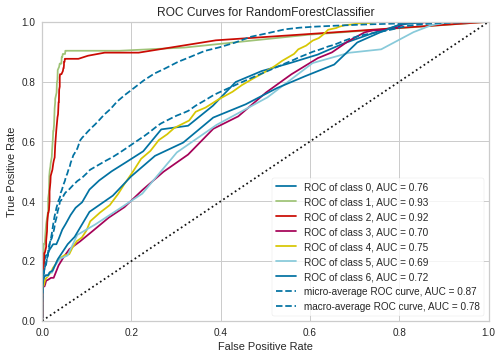

In [ ]:
plot_model(model)

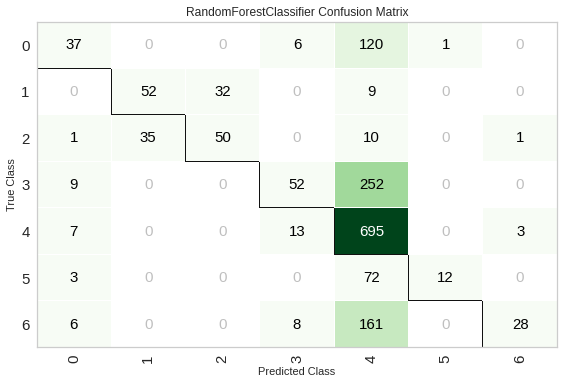

In [ ]:
plot_model(model, 'confusion_matrix')


In [ ]:
predictions = predict_model(model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.5528,0.756,0.3872,0.6289,0.4798,0.303,0.3691


In [ ]:
data.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,emotion
0,-284.482758,126.683823,-36.903915,43.976826,-12.961371,8.616020,-10.584815,12.599451,-14.106994,2.853625,-19.962849,1.703447,-13.035324,-0.337073,-9.029764,2.131634,-8.832778,-1.266960,2.483978,4.040265,-2.574543,4.316617,5.576896,4.538510,-2.905437,-9.130464,-7.126249,-4.621140,1.610941,-1.597993,-4.868733,-4.488620,0.970274,5.310254,2.055159,-4.810302,-3.550115,-0.912865,0.987710,-3.169195,4
1,-291.756378,86.479385,-31.917055,28.526455,-21.277540,6.544608,-26.522366,0.857760,-19.578068,9.424254,-15.387749,-1.319279,-14.049103,3.400151,-9.289942,-1.578900,-10.043350,3.212034,-8.140825,-2.060176,-5.583338,-1.114504,-2.181613,0.425673,-0.556289,3.811432,0.392357,1.247997,-1.299044,-2.572325,-4.302300,-1.309161,-1.129280,-0.781117,0.173170,0.295313,0.099329,0.685805,-0.623442,-1.003877,4
2,-381.791229,125.338554,-13.164070,70.746918,-14.940821,0.121462,-15.981153,-1.870955,-17.828106,0.436152,-17.293005,5.565217,-11.894168,-2.076418,-5.616802,-4.331069,-10.762467,-5.230440,-8.456790,4.806179,-5.453306,-2.912219,3.964604,-2.836176,0.997076,1.716107,-3.087765,-1.639011,-1.344397,3.572985,8.062300,5.931730,9.156085,4.193003,-0.938635,-5.856699,-2.251703,-2.078479,1.565114,-3.527836,3


In [ ]:
X = data.drop('emotion',axis=1).values
y = data['emotion'].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.18, random_state = 20)

In [ ]:
df_test = pd.read_csv("/content/drive/MyDrive/Intelligence Augmentation/Dataset/extracted_features_test.csv",index_col=0)
df_test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
0,-365.498199,117.096603,-45.860619,26.170340,-19.327950,5.826083,-8.625709,3.698611,-9.505263,4.179258,-13.381192,-3.726986,-7.116247,3.226846,5.748386,1.476014,1.322597,4.594974,0.649197,-1.733015,0.814768,-0.299269,-6.527150,-4.502021,-3.637551,1.005939,2.376040,1.181016,5.352484,1.096276,-4.148792,-0.943505,1.336754,1.921744,2.171972,-0.493963,0.609537,-0.420111,-1.198725,-0.289114
1,-347.949188,119.581123,-64.870789,28.289196,-17.227034,1.405791,-19.127012,-0.037109,-4.695950,4.757370,-16.268415,12.414000,-8.603649,11.250471,-0.791979,-2.082313,-6.251864,-2.138777,-4.154130,-5.112389,-5.249875,-1.381801,-7.779440,1.614060,-2.386897,-2.998730,-3.988345,-1.523020,0.471276,0.553853,-2.383639,7.244662,2.767389,0.624551,-0.911286,-0.642175,2.007694,1.311860,0.557786,-1.679821
2,-246.307327,127.621956,-64.692360,26.010170,-21.393129,1.611420,-25.611008,-3.000171,-19.976074,13.602427,-20.220438,-1.328003,-8.998646,5.648849,-1.329489,2.937313,-9.322475,0.491171,-8.508337,-3.777499,1.956479,-4.159590,-4.693715,-2.616529,-8.337893,-8.267322,-6.528329,-8.053255,-8.756011,-4.309391,-5.639263,-7.899954,-6.496264,-1.968293,-1.530059,-4.412982,1.180403,-0.227306,-1.377517,-2.090379
3,-354.178925,115.171700,-29.250555,28.661533,-19.046085,14.314231,-15.076301,10.669386,-13.682147,8.825348,-7.674388,10.033533,-7.335188,5.590045,-3.345659,5.903026,-3.312939,2.215315,-3.286599,0.610735,-2.747557,-0.006787,-3.942774,-1.357584,-4.423564,-1.568985,-2.932627,-3.079486,-2.911442,-4.484192,-1.678067,-3.059764,-3.152131,-3.387888,-2.307304,-3.455725,-1.442823,-1.538246,0.305538,-0.026795
4,-402.002899,131.972260,-3.767405,57.126369,-5.330755,14.938948,-10.694655,-0.575818,-2.828084,-2.775017,5.426503,-11.814539,6.172842,-6.474564,-1.124049,-2.844613,-4.112265,0.511748,-2.982589,0.428808,-5.600098,1.815831,-1.625146,0.119953,3.307432,-0.293566,-0.053331,-0.411368,0.906042,-1.957615,1.770211,-0.503118,-0.532595,1.169265,-0.273719,2.817329,1.192993,0.105612,-0.235465,0.841233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2487,-349.107269,76.573891,-37.418877,40.700100,-25.849449,16.583937,-19.864216,20.738710,-13.350039,8.598205,-8.942851,10.557148,-15.046796,10.864804,-6.474121,0.684995,-7.904607,2.453996,-3.748073,3.342761,1.997789,4.210738,0.685638,4.158682,0.996233,0.066024,-3.883340,-3.679035,-4.601952,-2.529417,-2.249333,-4.821554,-3.380815,-3.092365,-0.307622,-0.938499,0.011425,-2.136853,-1.519813,-2.471040
2488,-382.714264,117.925537,-38.304699,23.149023,-11.139799,0.702536,-12.385741,0.310302,-11.292994,9.875160,-18.107927,8.342640,-16.607336,6.982265,-5.785095,-1.396044,-3.511044,-1.461649,-4.694167,-4.209557,-6.234202,0.547342,-6.775701,-0.418312,-6.499691,-3.028145,-1.193457,-2.687193,-2.124609,-2.582636,-0.227916,2.161920,-0.852866,2.641413,2.506227,2.821455,0.886724,0.114524,2.025707,0.589980
2489,-368.741699,100.099487,-35.912487,35.036007,-22.540680,-2.362886,-17.496387,0.792720,-23.204842,14.956597,-19.718685,6.509315,-8.912682,2.213227,-3.567244,-5.028227,-6.247444,0.003401,-8.927715,-6.197325,-9.812338,-2.194094,-5.121887,-0.280560,5.319084,2.524623,6.756085,2.404695,-0.551675,-1.257791,-1.770794,-2.021196,-2.708773,-1.901199,-0.400989,-2.503710,-1.378878,-3.316211,-2.031156,-2.878968
2490,-293.917664,91.759872,-9.634653,33.840813,-7.767710,11.386954,-11.416109,-0.180402,-6.145333,-5.145947,3.897655,-9.143484,2.892286,-4.019638,4.512520,0.821729,3.726302,3.076912,-7.267413,-5.089863,-7.054235,0.407999,1.266936,3.211870,-2.264385,-2.048694,2.263656,1.882278,1.358537,-1.600724,4.665616,3.336652,3.241185,1.418096,1.189750,4.095005,0.337405,0.489863,1.054703,0.868742


In [ ]:
df_test = df_test.values

In [ ]:
df_test

array([[-3.65498199e+02,  1.17096603e+02, -4.58606186e+01, ...,
        -4.20111328e-01, -1.19872463e+00, -2.89113551e-01],
       [-3.47949188e+02,  1.19581123e+02, -6.48707886e+01, ...,
         1.31186044e+00,  5.57785928e-01, -1.67982125e+00],
       [-2.46307327e+02,  1.27621956e+02, -6.46923599e+01, ...,
        -2.27306321e-01, -1.37751687e+00, -2.09037924e+00],
       ...,
       [-3.68741699e+02,  1.00099487e+02, -3.59124870e+01, ...,
        -3.31621122e+00, -2.03115559e+00, -2.87896848e+00],
       [-2.93917664e+02,  9.17598724e+01, -9.63465309e+00, ...,
         4.89863306e-01,  1.05470347e+00,  8.68741930e-01],
       [-3.45081207e+02,  9.78607559e+01, -2.84839134e+01, ...,
         1.77191898e-01,  4.35182428e+00,  9.31727111e-01]])

# USING **OPTUNA**

In [ ]:
!pip install optuna

     |████████████████████████████████| 302 kB 12.8 MB/s 
     |████████████████████████████████| 80 kB 9.3 MB/s 
     |████████████████████████████████| 111 kB 55.7 MB/s 
     |████████████████████████████████| 141 kB 53.9 MB/s 
     |████████████████████████████████| 49 kB 6.8 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11136 sha256=ecf7ab6691c03d19f40e85d597869a82ec929f0400f00efa896ce61b88a48f38
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip


In [ ]:
import optuna
import sklearn.svm
def objective(trial):
    list_trees = [int(x) for x in range(200,2000,10)]
    classifier = trial.suggest_categorical('classifier', ['etrees', 'randomforest'])
    
    if classifier == 'RandomForest':
        n_estimators = trial.suggest_int('n_estimators', 200, 2000,10)
        max_depth = int(trial.suggest_float('max_depth', 10, 100, log=True))

        clf = sklearn.ensemble.RandomForestClassifier(
            n_estimators=n_estimators, max_depth=max_depth)
    else:

        n_estimators = trial.suggest_categorical('n_estimators', list_trees)
        max_features = trial.suggest_uniform('max_features', 0.15, 1.0)

        min_samples_split = trial.suggest_int('min_samples_split', 2, 14)
        min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 14)
        max_samples = trial.suggest_uniform('max_samples', 0.6, 0.99)
            
        clf  = sklearn.ensemble.ExtraTreesClassifier(n_estimators=n_estimators,
                             max_features=max_features, min_samples_split=min_samples_split,
                             min_samples_leaf=min_samples_leaf, max_samples=max_samples,
                             bootstrap=True, n_jobs=-1, verbose=0)

    return sklearn.model_selection.cross_val_score(
        clf,X_train,y_train, n_jobs=-1, cv=3).mean()

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

trial = study.best_trial

print('Accuracy: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

[I 2021-08-23 10:07:24,979] A new study created in memory with name: no-name-ca077be1-c757-4029-b49a-b7b8a4fa64aa
[I 2021-08-23 10:07:37,300] Trial 0 finished with value: 0.4900590851470683 and parameters: {'classifier': 'randomforest', 'n_estimators': 970, 'max_features': 0.3008972785964867, 'min_samples_split': 9, 'min_samples_leaf': 5, 'max_samples': 0.6158062177593763}. Best is trial 0 with value: 0.4900590851470683.
[I 2021-08-23 10:07:56,928] Trial 1 finished with value: 0.49552041481354164 and parameters: {'classifier': 'randomforest', 'n_estimators': 1230, 'max_features': 0.6342095188681287, 'min_samples_split': 2, 'min_samples_leaf': 8, 'max_samples': 0.9780409825909226}. Best is trial 1 with value: 0.49552041481354164.
[I 2021-08-23 10:08:22,160] Trial 2 finished with value: 0.49049538419669264 and parameters: {'classifier': 'etrees', 'n_estimators': 1490, 'max_features': 0.9273204349019503, 'min_samples_split': 10, 'min_samples_leaf': 11, 'max_samples': 0.790539535276682}. B

Accuracy: 0.5479576592255191
Best hyperparameters: {'classifier': 'randomforest', 'n_estimators': 1420, 'max_features': 0.8853126346541057, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_samples': 0.9535708837975303}


In [ ]:
study.best_params

{'classifier': 'randomforest',
 'max_features': 0.8853126346541057,
 'max_samples': 0.9535708837975303,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 1420}

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

clf = RandomForestClassifier(
 max_features= 0.8853126346541057,
 max_samples= 0.9535708837975303,
 min_samples_leaf=1,
 min_samples_split=5,
 n_estimators= 1420,
 n_jobs = -2)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None,
                       max_features=0.8853126346541057, max_leaf_nodes=None,
                       max_samples=0.9535708837975303,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=1420,
                       n_jobs=-2, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [ ]:
from sklearn.metrics import accuracy_score
# Make predictions for the test set
y_pred_test = clf.predict(X_test)
# View accuracy score
accuracy_score(y_test, y_pred_test)

0.5611940298507463

In [ ]:
len(df_test)

2492

In [ ]:
l = []
for i in df_test:

  a = clf.predict([i])

  l.append(le.inverse_transform(a))


In [ ]:
for i in range(0,len(l)):
  l[i] = l[i][0]

In [ ]:
l

['neutral',
 'neutral',
 'neutral',
 'neutral',
 'disgust',
 'neutral',
 'fear',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'joy',
 'neutral',
 'neutral',
 'neutral',
 'anger',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'anger',
 'neutral',
 'neutral',
 'neutral',
 'joy',
 'neutral',
 'neutral',
 'anger',
 'neutral',
 'neutral',
 'disgust',
 'neutral',
 'anger',
 'neutral',
 'neutral',
 'neutral',
 'sadness',
 'anger',
 'neutral',
 'surprise',
 'neutral',
 'neutral',
 'neutral',
 'surprise',
 'neutral',
 'anger',
 'disgust',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'joy',
 'neutral',
 'anger',
 'neutral',
 'fear',
 'neutral',
 'neutral',
 'anger',
 'neutral',
 'neutral',
 'sadness',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'fear',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'n

In [ ]:
df_test = pd.DataFrame(df_test)

In [ ]:
df_test = pd.read_csv("/content/drive/MyDrive/Intelligence Augmentation/Dataset/test.csv",index_col=0)
df_test

""
filename
26199.mp3
692.mp3
16821.mp3
1608.mp3
47947.wav
...
16692.mp3
29505.mp3
5807.mp3


In [ ]:
df_test['emotion'] = l
df_test.to_csv('FPrediction.csv')